In [13]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
from geopy.geocoders import Nominatim
import folium
import re
import json
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from sklearn.cluster import KMeans
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [5]:
df=pd.read_csv("/content/Dataset .csv")
df.shape
df.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [3]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing':percent_missing})

In [6]:
missing_values=df[(df['Aggregate rating'].isnull()) | (df['Aggregate rating']=='NEW') |(df['Aggregate rating']=='-')]
vx=df[(df['Aggregate rating'].notnull()) & (df['Aggregate rating']!='NEW') & (df['Aggregate rating']!='-')]

In [11]:
df['City']=df['City'].fillna('Quick Bites, Casual Dining')
df['Cuisines']=df['Cuisines'].fillna('North Indian, chinese, South Indian')
df['Locality']=df['Locality'].fillna('BTM')

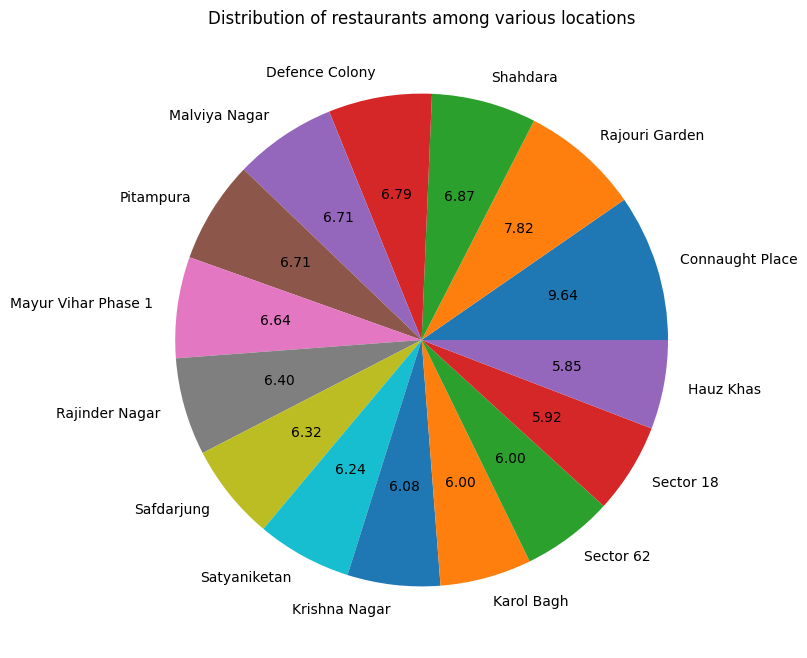

In [16]:
plt.figure(figsize=(10,8))
x = df.Locality.value_counts()[:15]
y = df['Locality'].value_counts()[:15].index
plt.pie(x, labels=y, autopct='%.2f')
plt.title('Distribution of restaurants among various locations')
plt.show()

Text(0, 0.5, 'number of Restaurants')

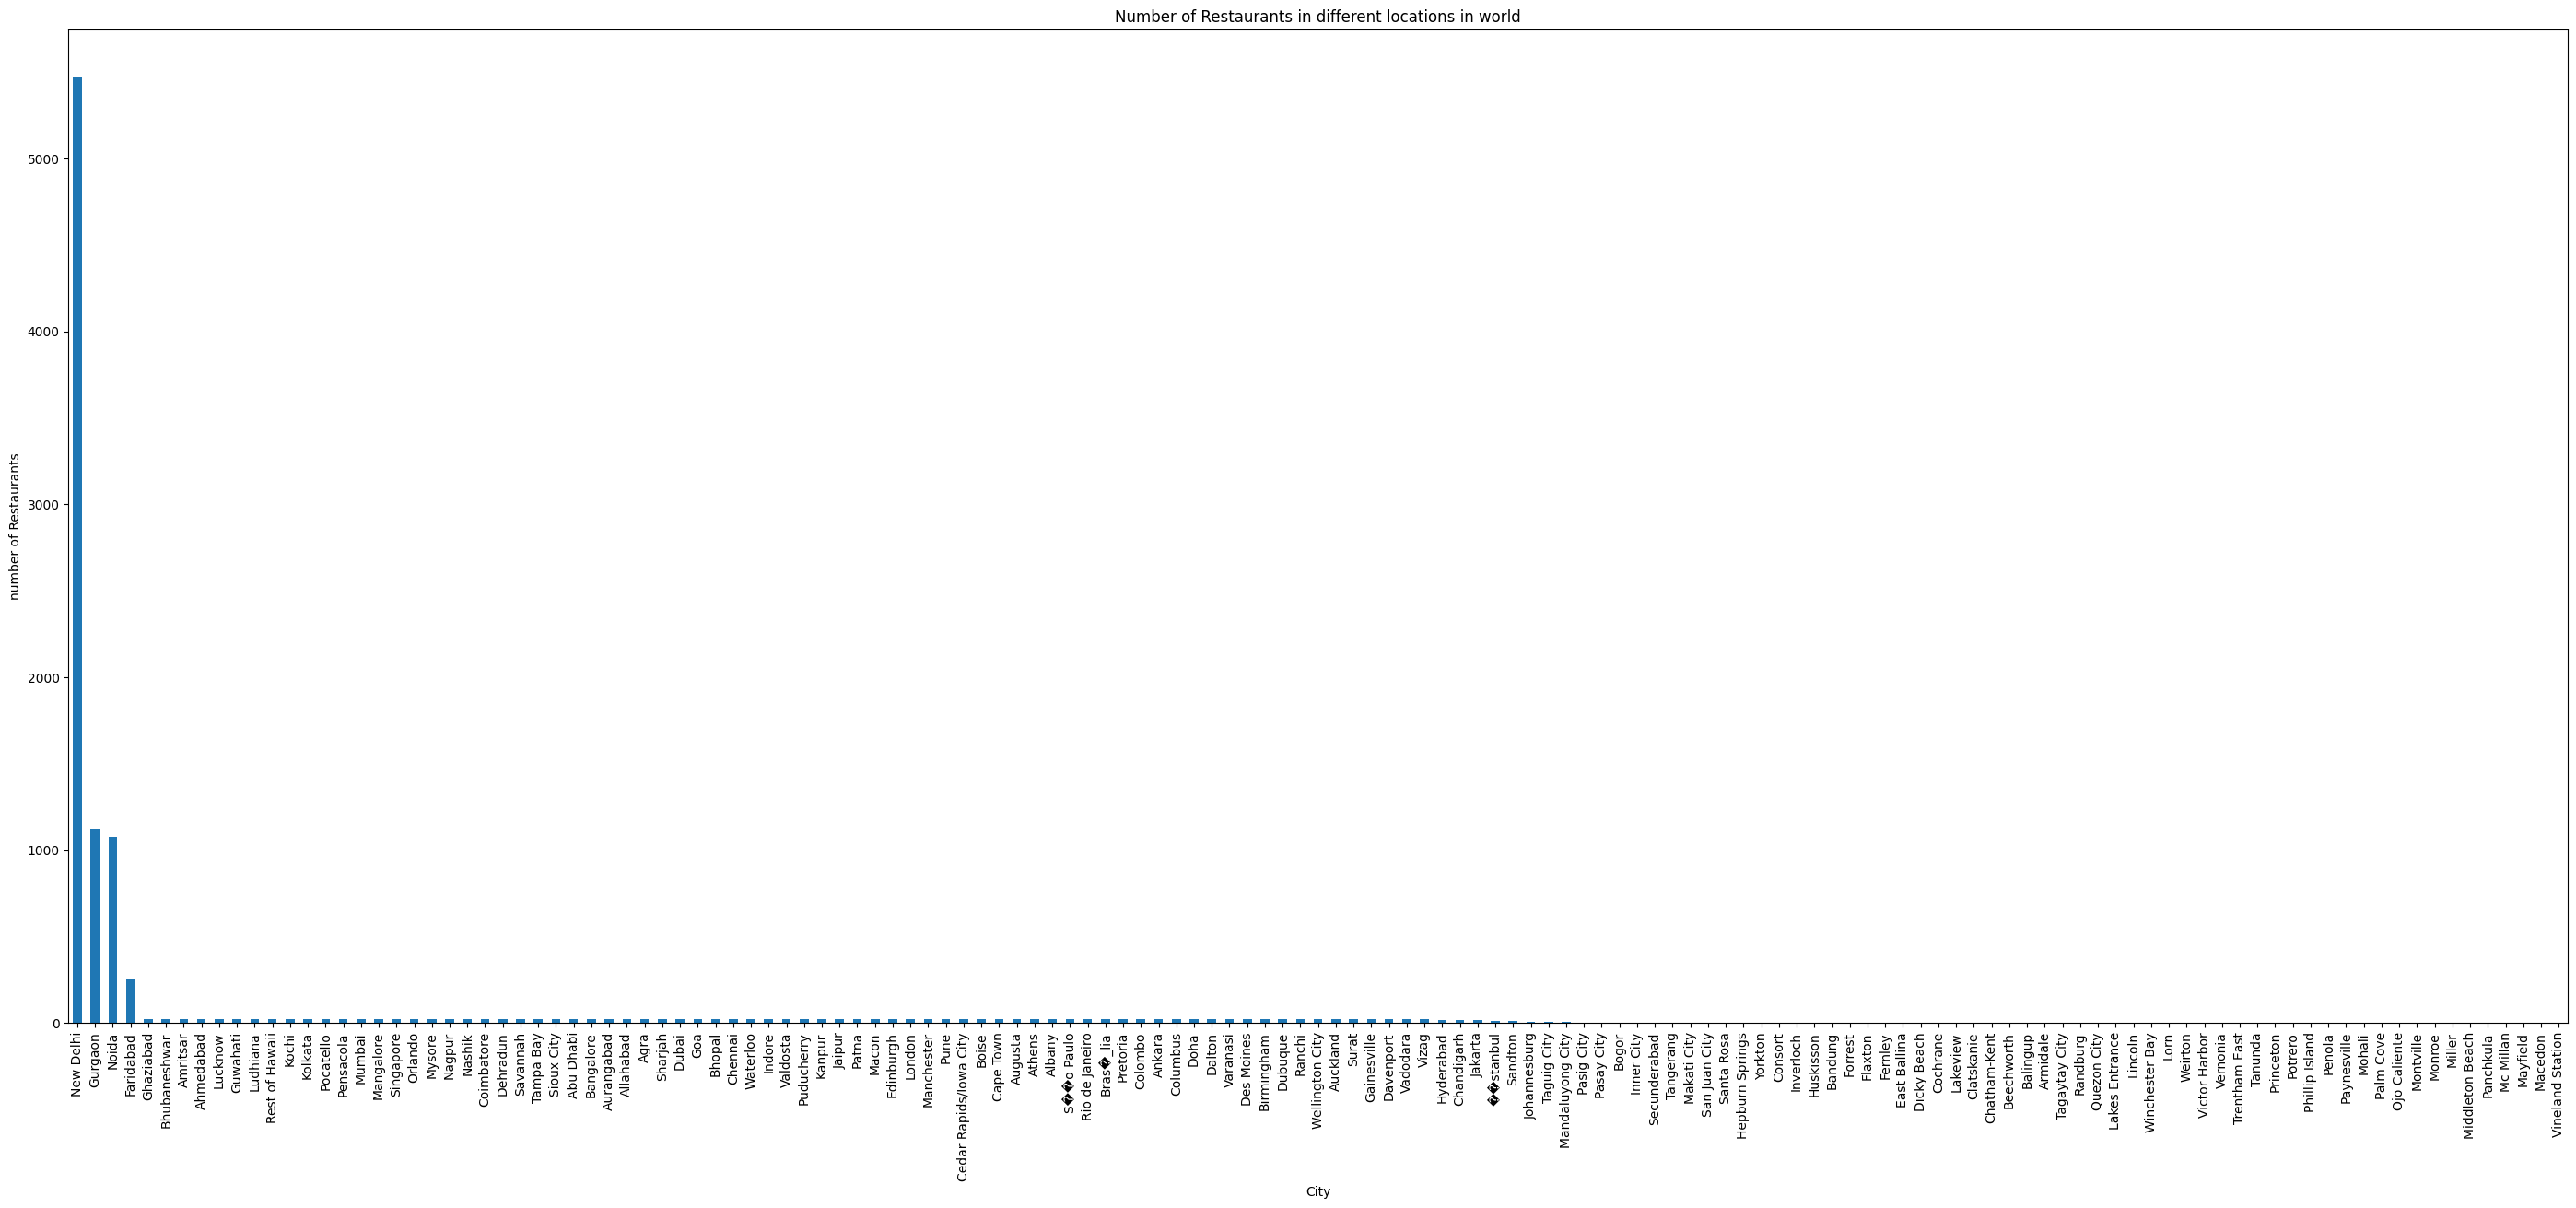

In [27]:
plt.figure(figsize=(35,14))
k =df['City'].value_counts()
k.plot(kind='bar')
plt.title('Number of Restaurants in different locations in world')
plt.xlabel('City')
plt.ylabel('number of Restaurants')

Text(0, 0.5, 'counts')

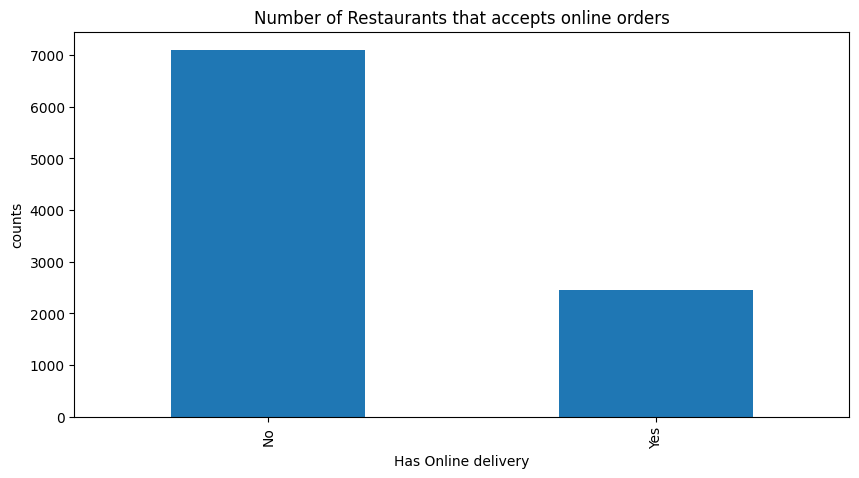

In [28]:
plt.figure(figsize=(10,5))
k =df['Has Online delivery'].value_counts()
k.plot(kind='bar')
plt.title('Number of Restaurants that accepts online orders')
plt.xlabel('Has Online delivery')
plt.ylabel('counts')

Text(0, 0.5, 'No of Restaurants')

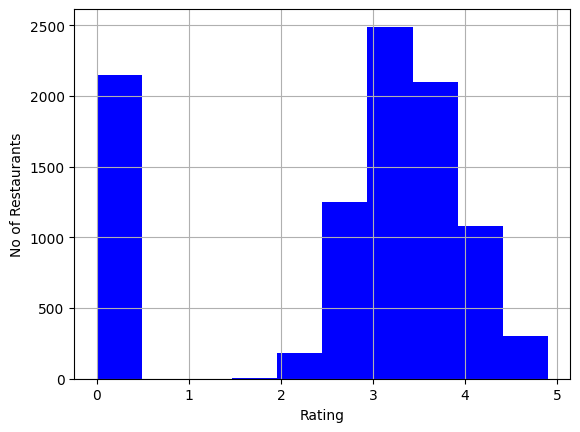

In [30]:
df['Aggregate rating'] = df['Aggregate rating'].apply(lambda r: float(r))
df['Aggregate rating'].hist(color='blue')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')

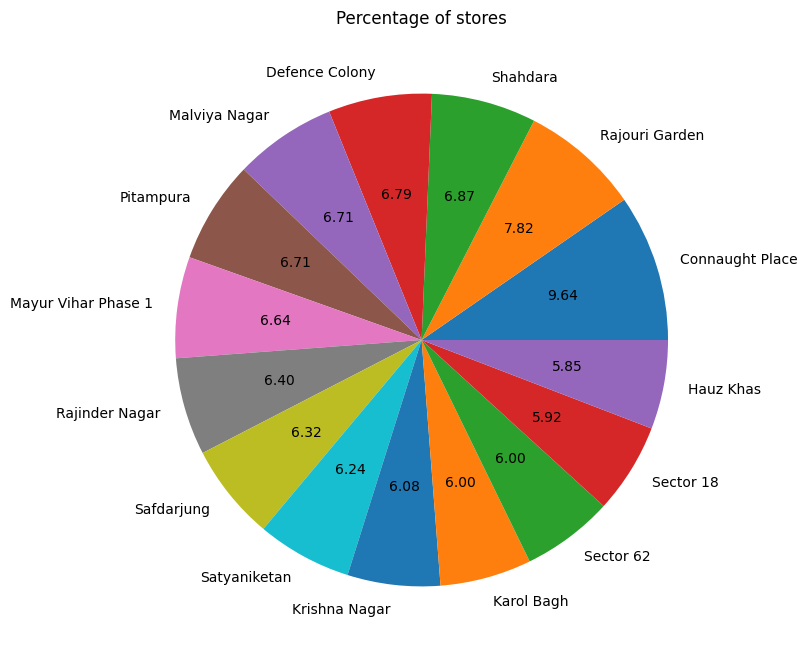

In [33]:
plt.figure(figsize=(10,8))
x = df.Locality.value_counts()[:15]
y = df['Locality'].value_counts()[:15].index
plt.pie(x, labels=y, autopct='%.2f')
plt.title('Percentage of stores')
plt.show()

Text(0.5, 0, 'Has Table booking')

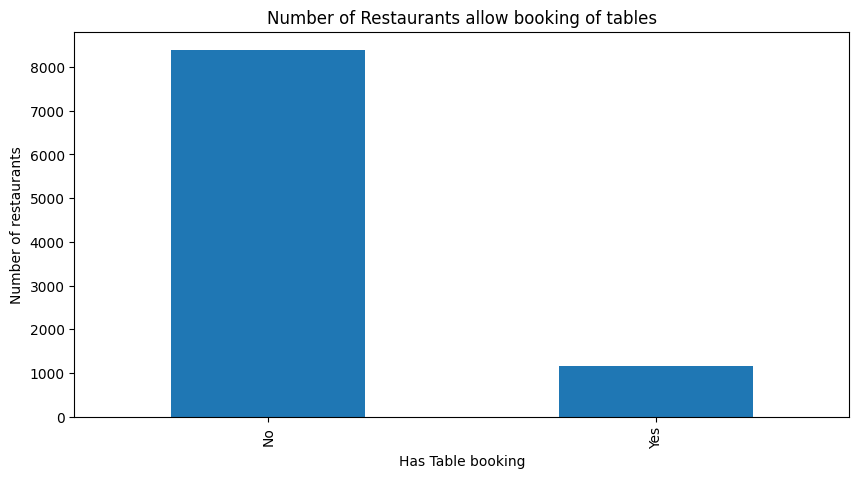

In [34]:
plt.figure(figsize=(10,5))
k =df['Has Table booking'].value_counts()
k.plot(kind='bar')
plt.title('Number of Restaurants allow booking of tables')
plt.ylabel('Number of restaurants')
plt.xlabel('Has Table booking')

Text(0.5, 1.0, 'rating of restaurant vs online order')

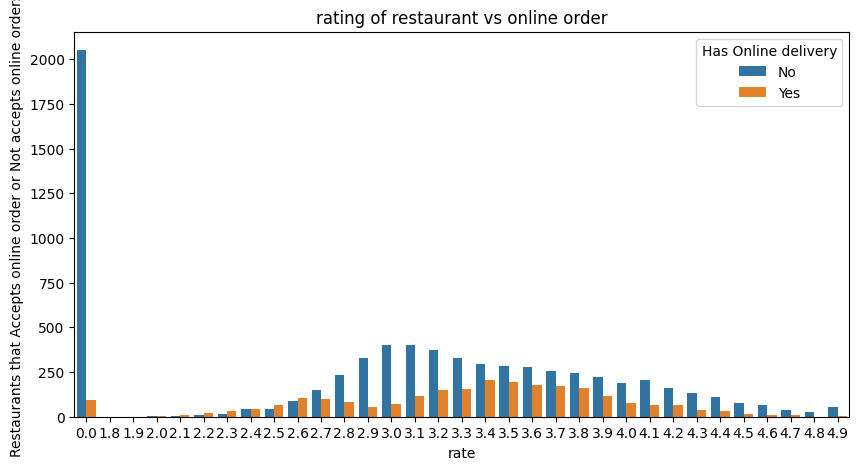

In [47]:
import seaborn as sns
plt.figure(figsize = (10,5))
sns.countplot(x=df['Aggregate rating'], hue = df['Has Online delivery'])
plt.ylabel("Restaurants that Accepts online order or Not accepts online orders")
plt.xlabel('rate')
plt.title("rating of restaurant vs online order")

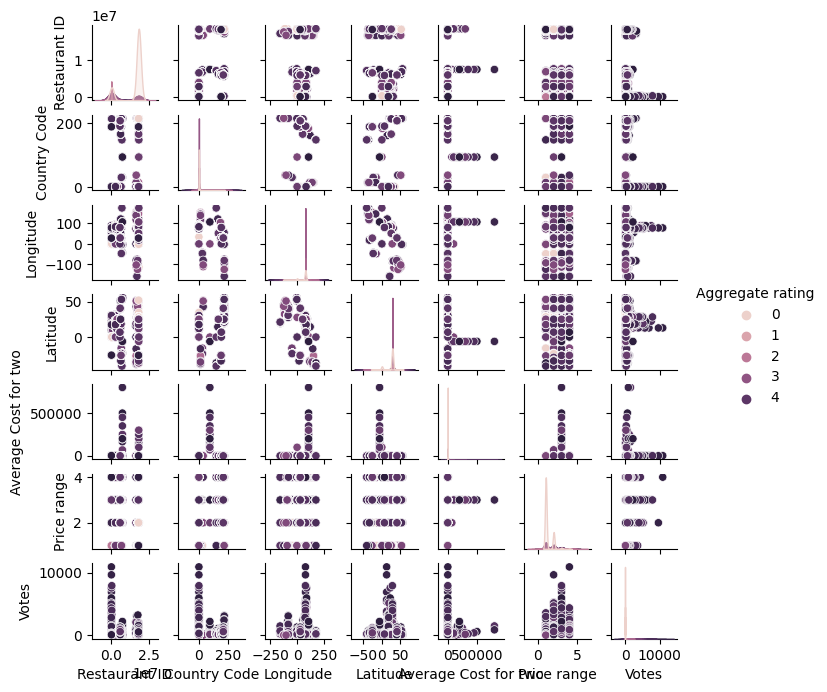

In [54]:
sns.pairplot(df,hue="Aggregate rating",height=1)

plt.show()

Text(0, 0.5, 'No of Restaurants')

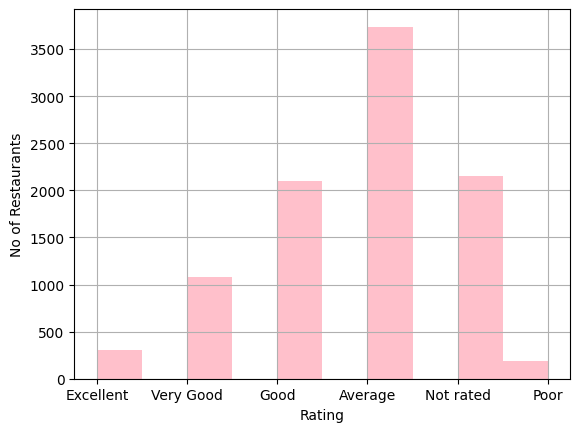

In [58]:
df['Rating text'] = df['Rating text'].apply(lambda r: str(r))
df['Rating text'].hist(color='pink')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')